### Creating DataFrame
<hr>

In [29]:
import pandas as pd
dataframe = pd.read_csv('appstore_games (5).csv')
df = dataframe.iloc[:,[2,5,6,7,8,11,12,13,15,16,17]]

In [30]:
# Data Cleaning

df = df[df['Average User Rating'] >= 4.0]

df = df[df['User Rating Count'] >= 200.0]

import datetime
df['Current Version Release Date'] = pd.to_datetime(df['Current Version Release Date'])
df['Original Release Date'] = pd.to_datetime(df['Original Release Date'])
df['Update_Gap'] = df['Current Version Release Date']-df['Original Release Date']
df = df[df.Update_Gap >= datetime.timedelta(days=180)]

# Filling up Missing Values
df['In-app Purchases'] = df['In-app Purchases'].fillna(0.00)
df['Price'] = df['Price'].fillna(0.00)

# Genre Categorization
df.loc[df['Genres'].str.contains('Puzzle'), 'Genres'] = 'Puzzle'
df.loc[df['Genres'].str.contains('Adventure'), 'Genres'] = 'Adventure'
df.loc[df['Genres'].str.contains('Action'), 'Genres'] = 'Action'
df.loc[df['Genres'].str.contains('Family'), 'Genres'] = 'Family'
df.loc[df['Genres'].str.contains('Board'), 'Genres'] = 'Puzzle'
df.loc[df['Genres'].str.contains('Role'), 'Genres'] = 'Adventure'
df.loc[df['Genres'].str.contains('Strategy'), 'Genres'] = 'Strategy'
df.loc[df['Genres'].str.contains('Role Playing'), 'Genres'] = 'Adventure'

In [31]:
# Updated dataframe
df

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Age Rating,Languages,Size,Genres,Original Release Date,Current Version Release Date,Update_Gap
0,Sudoku,4.0,3553.0,2.99,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",1.585357e+07,Puzzle,2008-11-07,2017-05-30,3126 days
24,Boomshine,4.0,637.0,0.99,0,4+,EN,2.287309e+07,Puzzle,2008-07-10,2017-05-20,3236 days
26,Fieldrunners,4.0,41869.0,2.99,"0.99, 0.99, 0.99, 0.99",9+,EN,7.504179e+07,Action,2008-05-10,2018-11-04,3830 days
30,Expert Sudoku,4.0,523.0,2.99,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",9.543680e+06,Puzzle,2008-10-21,2017-05-30,3143 days
33,Chess - tChess Pro,4.0,3062.0,7.99,0,4+,"EN, FR, DE, JA, KO, ZH",7.517184e+06,Puzzle,2008-05-11,2019-07-04,4071 days
...,...,...,...,...,...,...,...,...,...,...,...,...
15666,Days of Prophecy,4.5,344.0,0.00,4.99,12+,EN,1.746969e+09,Adventure,2019-01-05,2019-08-05,212 days
15736,Woody Bricks and Ball Puzzles,4.5,1746.0,0.00,0,4+,EN,1.222994e+08,Puzzle,2018-12-15,2019-07-30,227 days
15833,Bubble Pop Spinner,4.5,1398.0,0.00,"0.99, 2.99, 8.99, 17.99, 0.99, 49.99, 94.99",4+,EN,9.195622e+07,Strategy,2019-01-21,2019-07-29,189 days
16171,Idle Convoy VS Zombies Inc,4.5,329.0,0.00,"4.99, 1.99, 4.99",9+,EN,2.683167e+08,Adventure,2019-05-27,2019-12-07,194 days


### Genre Analysis

In [32]:
df = df.rename(columns={'User Rating Count': 'User_Rating_Count'})

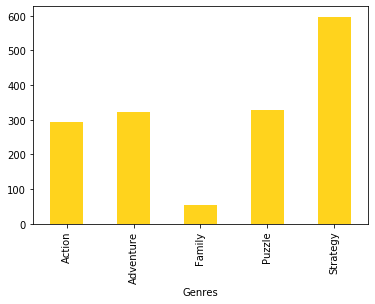

In [33]:
df.groupby('Genres').User_Rating_Count.count().plot(kind='bar',color='#ffd31d')

##### Inference: Most apps with ratings 4.0 and above belong to Strategy Genre,   Action, Adventure and Puzzle have almost half the number of apps with 4.0 and above rating as compared to the Strategy Genre and the Genre Family has least number of apps with 4.0 and above rating.
<hr>


###  Size Analysis

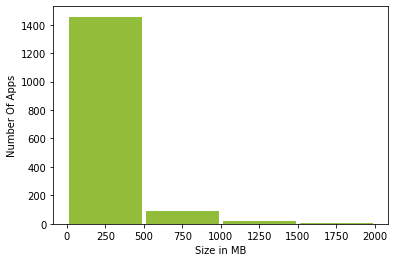

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("Size in MB")
plt.ylabel("Number Of Apps")
plt.hist(df.Size/1000000, bins=[0,500,1000,1500,2000], rwidth=0.95, color='#91bd3a')
plt.show()

* **The ABOVE graph shows that the maximum number of 4.0 and above rated apps belong to the range of 0-500 MB**
* **The BELOW graph shows the number of apps belonging to different size ranges (between 0 to 500 MB)**
<hr>

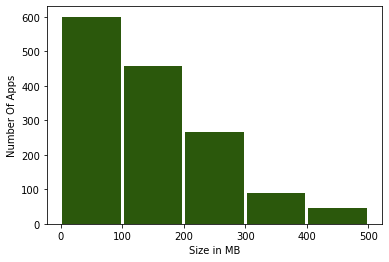

In [35]:
x = df.Size[(df['Size'] <= 500000000)]/1000000
plt.xlabel("Size in MB")
plt.ylabel("Number Of Apps")

plt.hist(x, bins=[0,100,200,300,400,500], rwidth=0.95, color='#2b580c')
plt.show()

##### Inference :  Most of the apps with ratings 4.0 and above are of size range (0-500 MB), on futher analysis through Plot 2 (0-300 MB) is found as the optimal size range for getting higher user rating.
<hr>

### Price Analysis

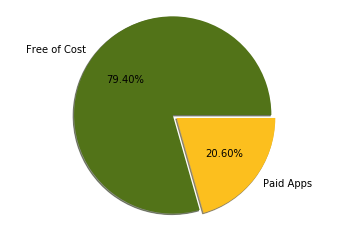

In [36]:
p1 = df.Price[(df['Price'] == 0.00)].count()
p2 = df.Price[(df['Price'] != 0.00)].count()

vals = [p1,p2]
label = ["Free of Cost","Paid Apps"]
plt.pie(vals,labels=label,autopct='%1.2f%%',radius=2.0,explode=[0,0.1],shadow=True,colors=['#527318','#fcbf1e'])
plt.axis("equal")
plt.show()

* **The ABOVE pie chart shows that most of the apps having rating 4.0 and above are available as FREE OF COST**
* **The BELOW graph shows the number of apps available in different price ranges, having rating 4.0 and above**
<hr>

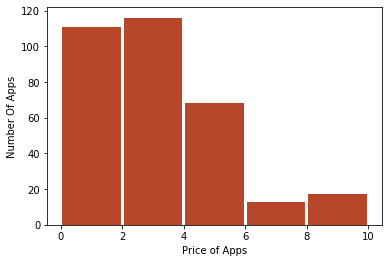

In [37]:
x = df.Price
plt.xlabel("Price of Apps")
plt.ylabel("Number Of Apps")

plt.hist(x, bins=[0.01,2,4,6,8,10], rwidth=0.95, color='#b7472a')
plt.show()

##### Inference : Apps that are available for free consist of around 80% of total apps having 4.0 and above rating, price range of 0-6 units have few apps with 4.0 and above rating thereafter the number of apps in price ranges are significantly low.
<hr>

### Age Rating Analysis

In [38]:
df['Age Rating'].unique()

array(['4+', '9+', '12+', '17+'], dtype=object)

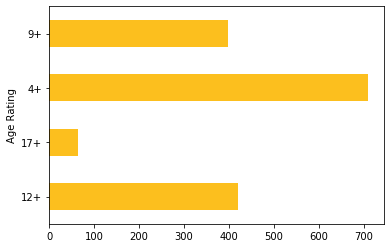

In [39]:
df.groupby('Age Rating').User_Rating_Count.count().plot(kind='barh',color='#fcbf1e')

##### Inference : The apps with lower Age Rating have more number of Apps rated 4.0 and above, as the Age rating which are also the age restrictions increases the chances of it getting higher ratings decreases.
<hr>

### In app Purchases Analysis

In [40]:
df = df.rename(columns={'In-app Purchases': 'In_app_Purchases'})

In [41]:
k1 = df.In_app_Purchases[(df['In_app_Purchases'] == 0)].count()
k2 = df.In_app_Purchases[(df['In_app_Purchases'] != 0)].count()

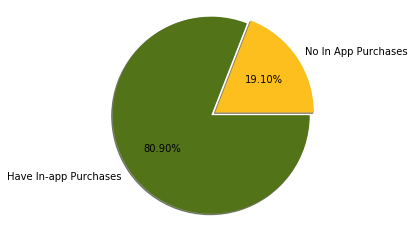

In [42]:
vals = [k1,k2]
label = ["No In App Purchases","Have In-app Purchases"]
plt.pie(vals,labels=label,autopct='%1.2f%%',radius=2.0,explode=[0,0.1],shadow=True,colors=['#fcbf1e', '#527318'])
plt.axis("equal")
plt.show()

##### Inference : Almost 81% apps with rating 4.0 and above have In app purchases, hence apps with In app purchases are more desirable by the users than apps with no In app Purchases.

   ## Conclusion:
   <hr>

**1.** **Genre Analysis**<br> 
     Strategy genre is the most popular among all genres, so a app game with Strategy genre is expected to yield better user        ratings. On the other hand, Family genre has least number of apps with rating 4.0 and above.<br>
**2.** **Size Analysis**<br>
     Most of the higher rated apps have size ranging from 0 to 300 MB, and thus it is the optimal size range that a app game        must have to get high ratings of 4.0 and above.<br>
**3.** **Price Analysis**<br>Most of the app games having higher rating are available for Free. Price range of 0 to 6 units have few apps with high ratings, as the price of apps increases it is observed that their chances of getting a high user rating of    4.0 and above decreases.<br>
**4.** **Age Rating Analysis**<br>
     Age rating of 4+ have maximum number of apps with user ratings of 4.0 and above. As the Age rating increases the                number of apps getting high user rating decreases, this may be because of the fact that app games with high age rating is      accessible by lesser audience.<br>
**5.** **In app Purchases Analysis**<br>
     Over 80% app games with user ratings of 4.0 and above have some In app purchases, which shows that it is good for any          developer to include In app purchases as they seem to be more desirable by most of the users.